# EDA - General

### Import and Preview Data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
df = pd.read_csv("./Data/Crop_Recommendation.csv")

Preview the dataset by using .head()

In [4]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


### Inital DataFrame Review

Use .info() to get an understanding of the datatypes the dataset has, and number of values. Also use.isnull().sum() to confirm there are no nun values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
print(df.isnull().sum())

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


There are 2,200 entries, and none have null values. This dataset only contains numerical datatypes, excluding the target variable, and there is no need to change any.

Now, "Crop" is the target variable for the dataset. Use .value_counts() to see the crops listed and the values for each. 

In [7]:
df['Crop'].value_counts()

Pomegranate    100
PigeonPeas     100
Grapes         100
Lentil         100
Orange         100
ChickPea       100
Apple          100
Maize          100
Banana         100
Blackgram      100
MothBeans      100
Papaya         100
Coconut        100
Rice           100
MungBean       100
Muskmelon      100
Coffee         100
Watermelon     100
Mango          100
KidneyBeans    100
Cotton         100
Jute           100
Name: Crop, dtype: int64

There are 22 crops with 100 values for each, which confirms the 2,200 entries given from .info()

Next, .describe() can be used to provide the descriptive statistics for df. 

In [10]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df['pH_Value'].mean()

6.469480065256364

In [12]:
df["Rainfall"].mean()

103.46365541576817

### Visualizing Distributions

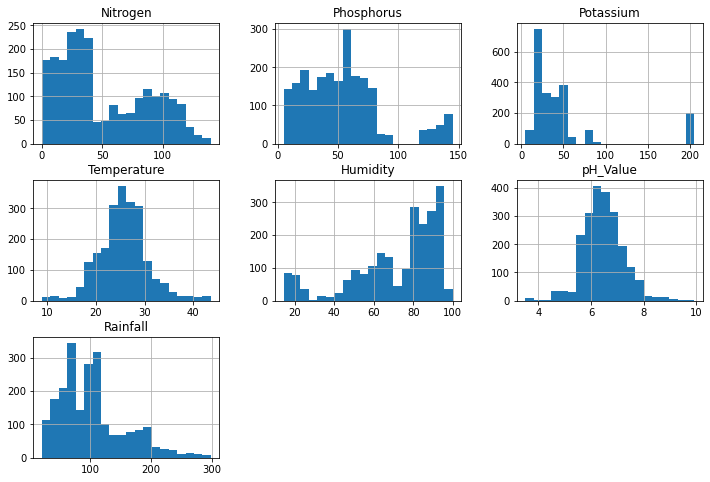

In [8]:
df.hist(figsize=(12,8), bins=20)
plt.show()

### Histogram Basic Descriptions 
* Nitrogen --> roughly unifrom
* Phosporus --> somewhat skewed, there is a higher frequency of lower values and non around 100-110
* Potassium --> skewed, with a distinct peak 
* Temperature --> roughly normally distributed, most samples have temperatures around central value 
* Humidity --> somewhat skewed to the right 
* pH_Value --> most normally distrbuted
* Rainfall --> skewed, most samples have rainfall values below the mean

### Correlation Analysis

Performing a Correlation Analysis helps visualize which columns are correlated and which are not. This can help us understand what is important for crop health.

In [9]:
correlation_matrix = df.corr()

correlation_matrix

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

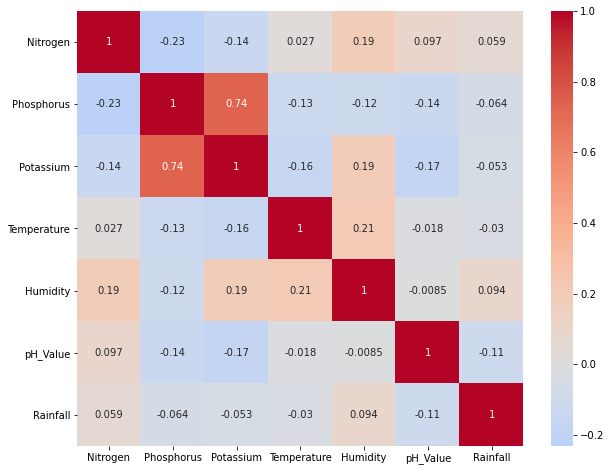

In [10]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center=0,)

Phosphorus and Potassium are highly correlated 

### Comparitive Analysis 

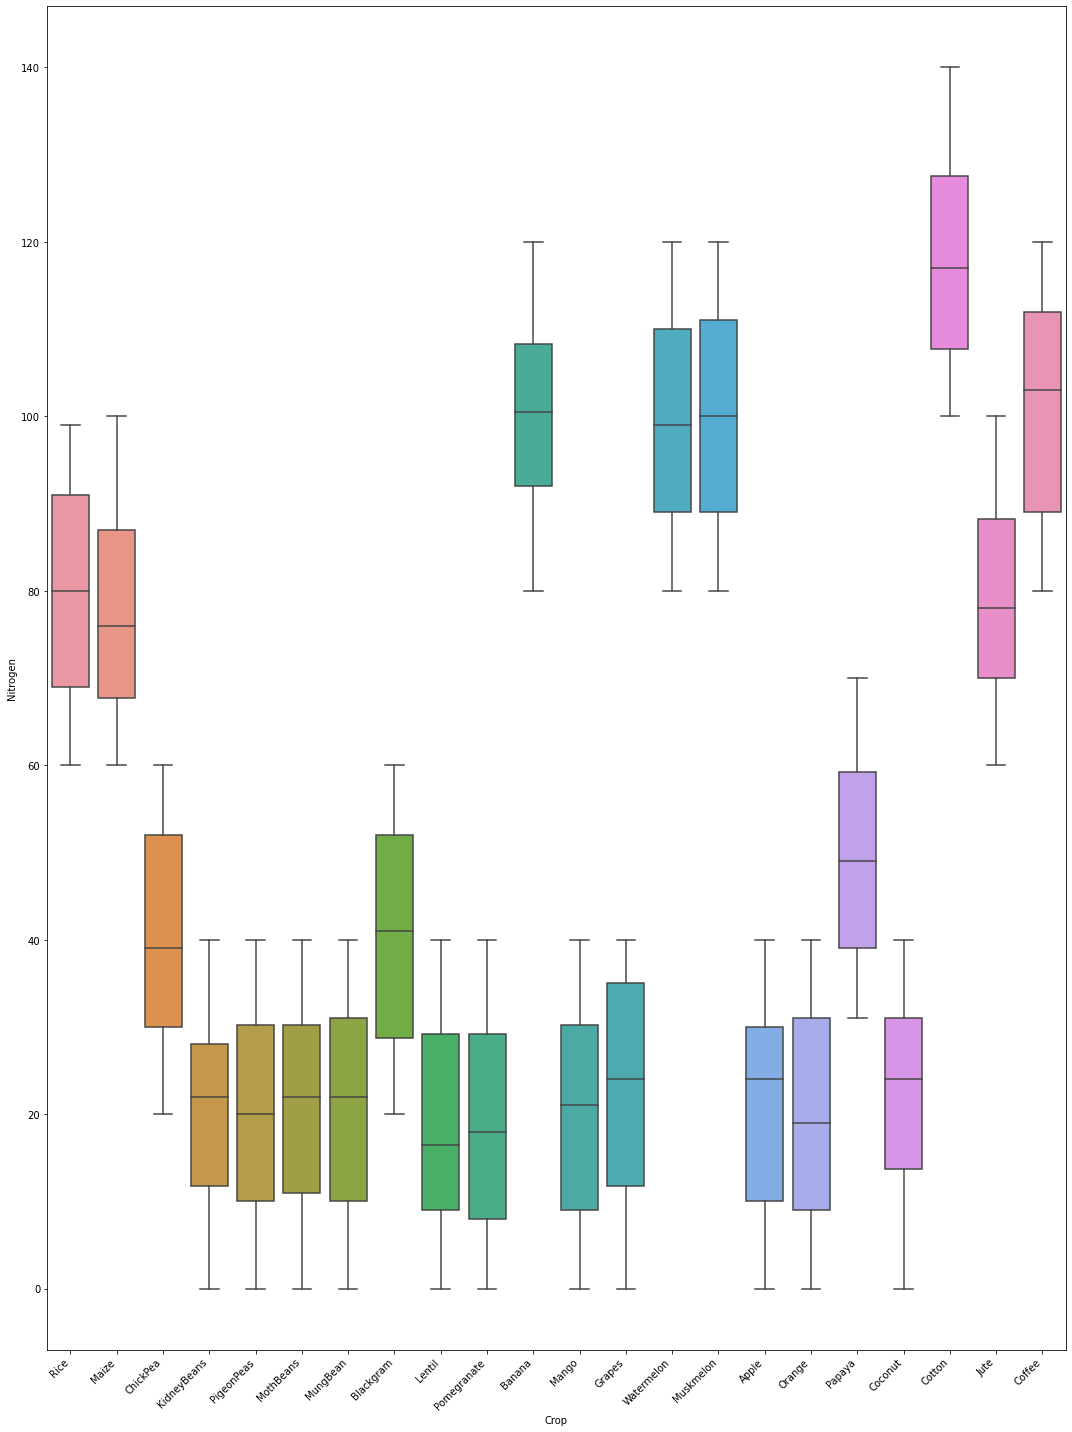

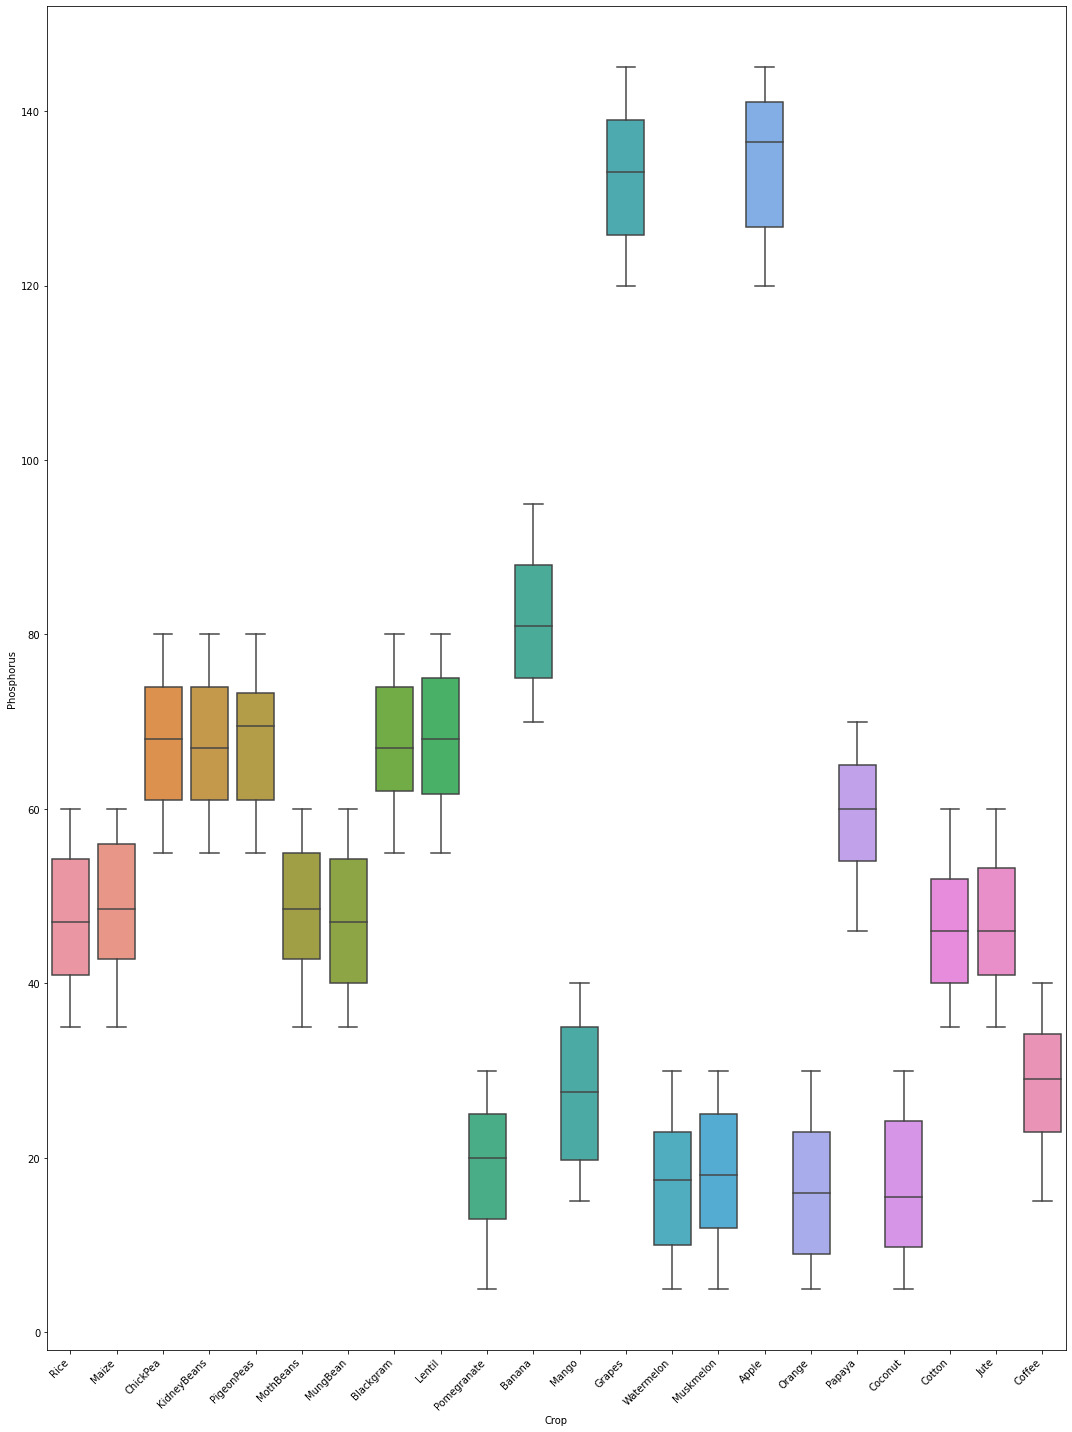

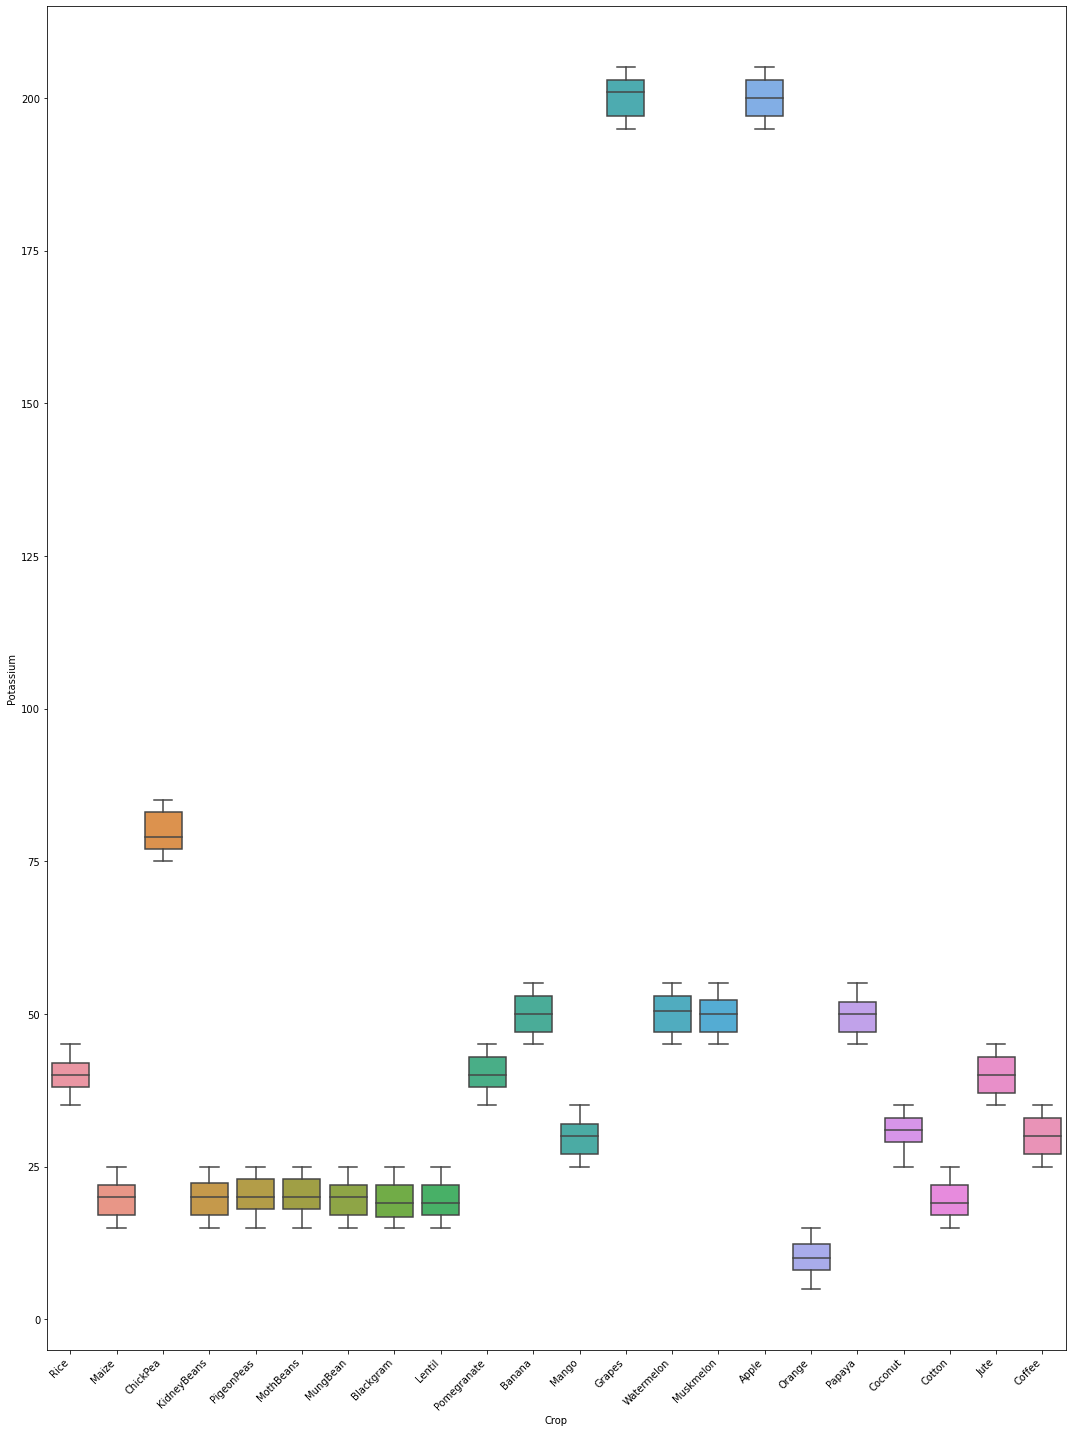

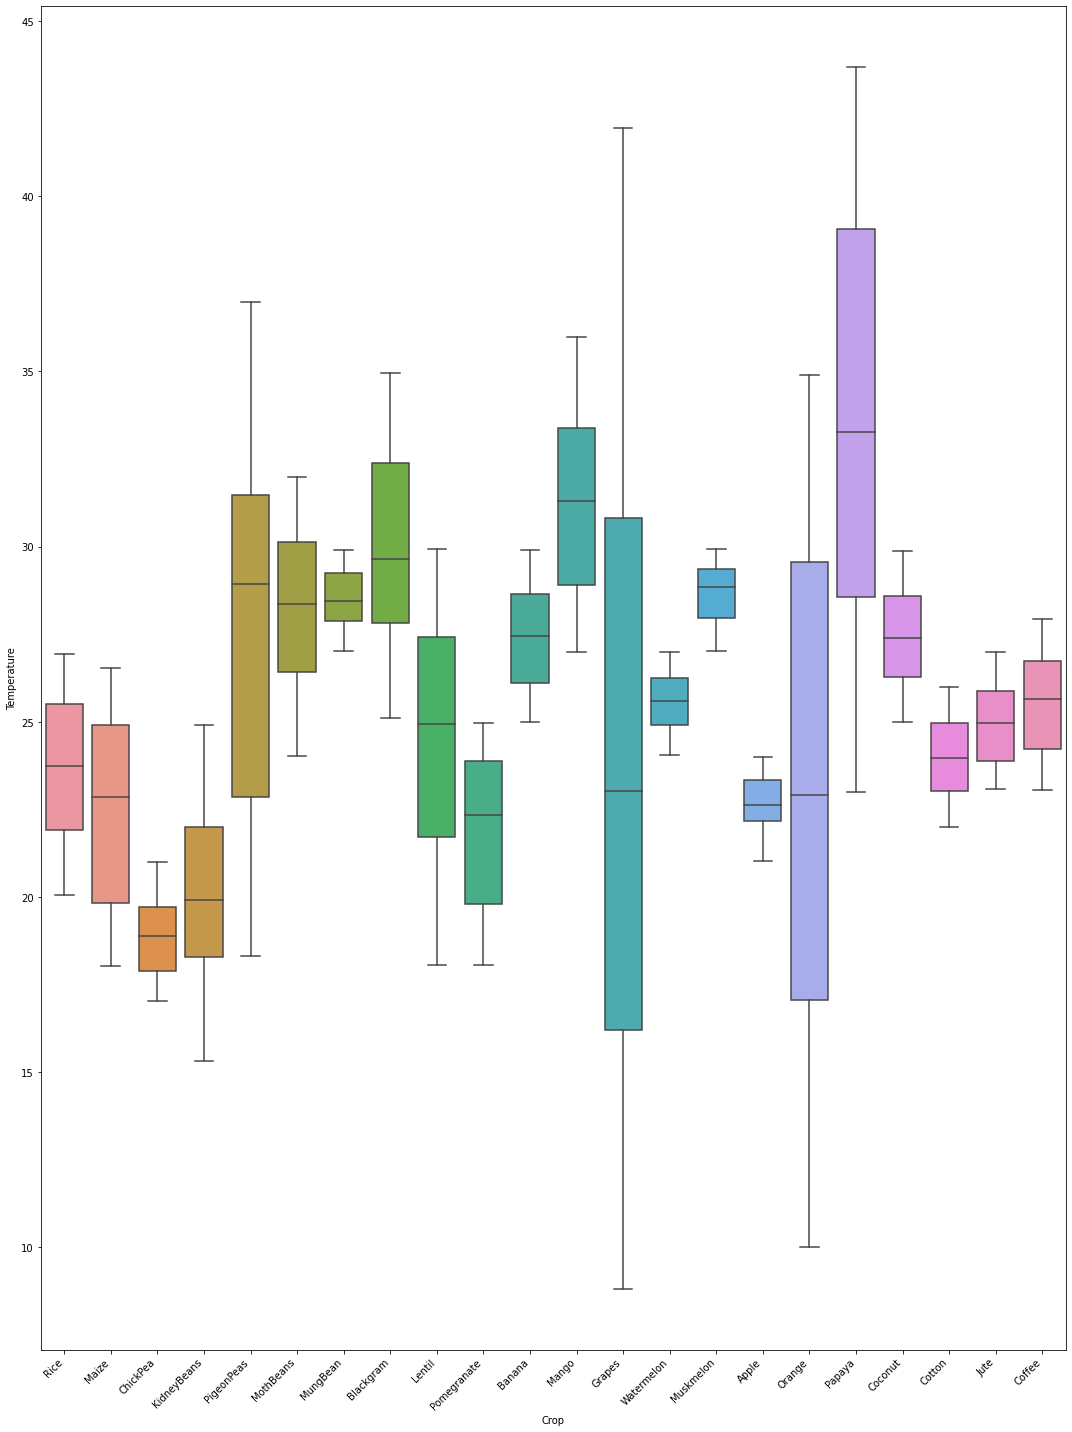

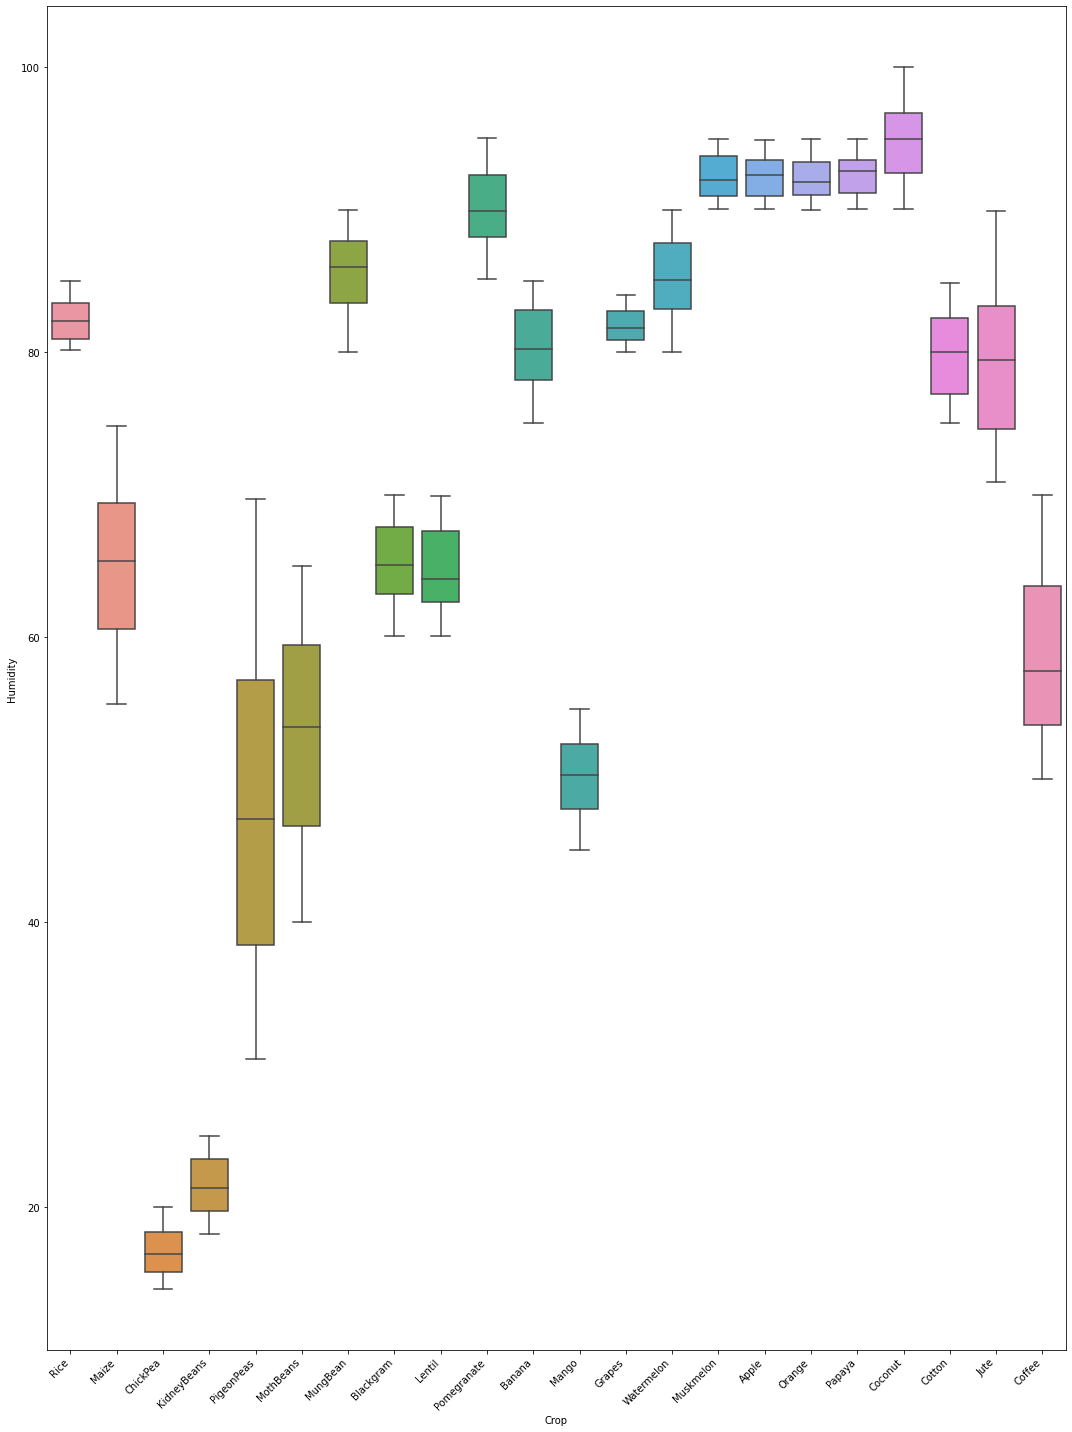

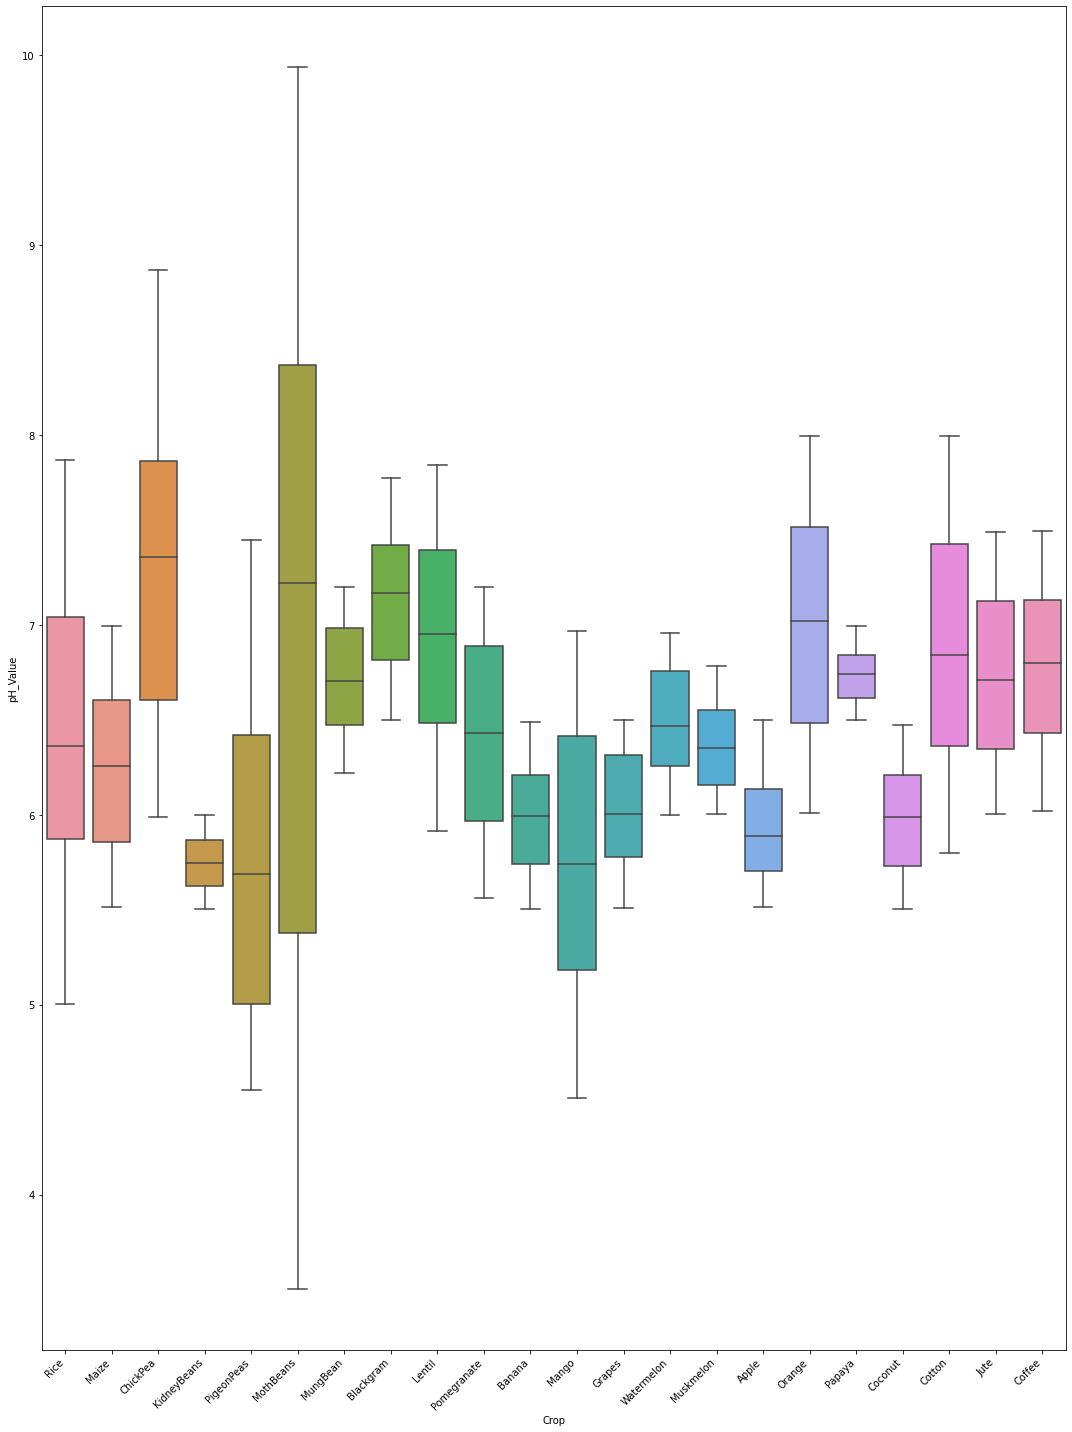

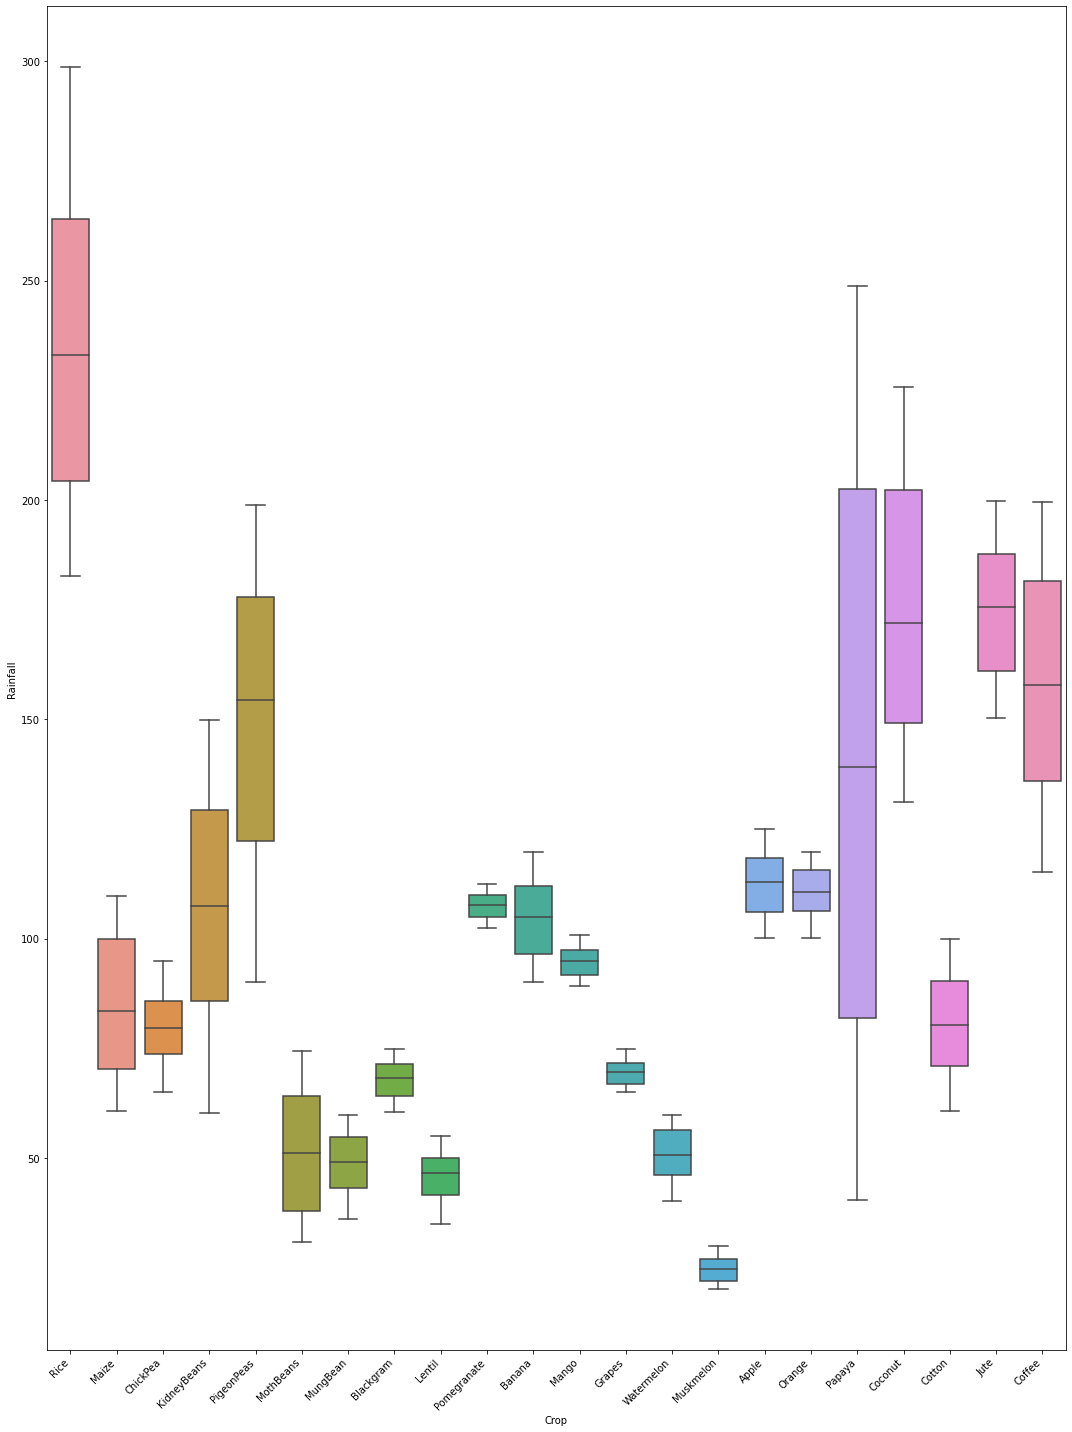

In [11]:
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

for feature in features:
    plt.figure(figsize = (15,20))
    sns.boxplot(x='Crop', y=feature, data=df)
    plt.xticks(rotation = 45, ha='right')
    plt.tight_layout()

The boxplots above show one of the features in the dataset in comparison to all 22 crops.

### Scatterplots

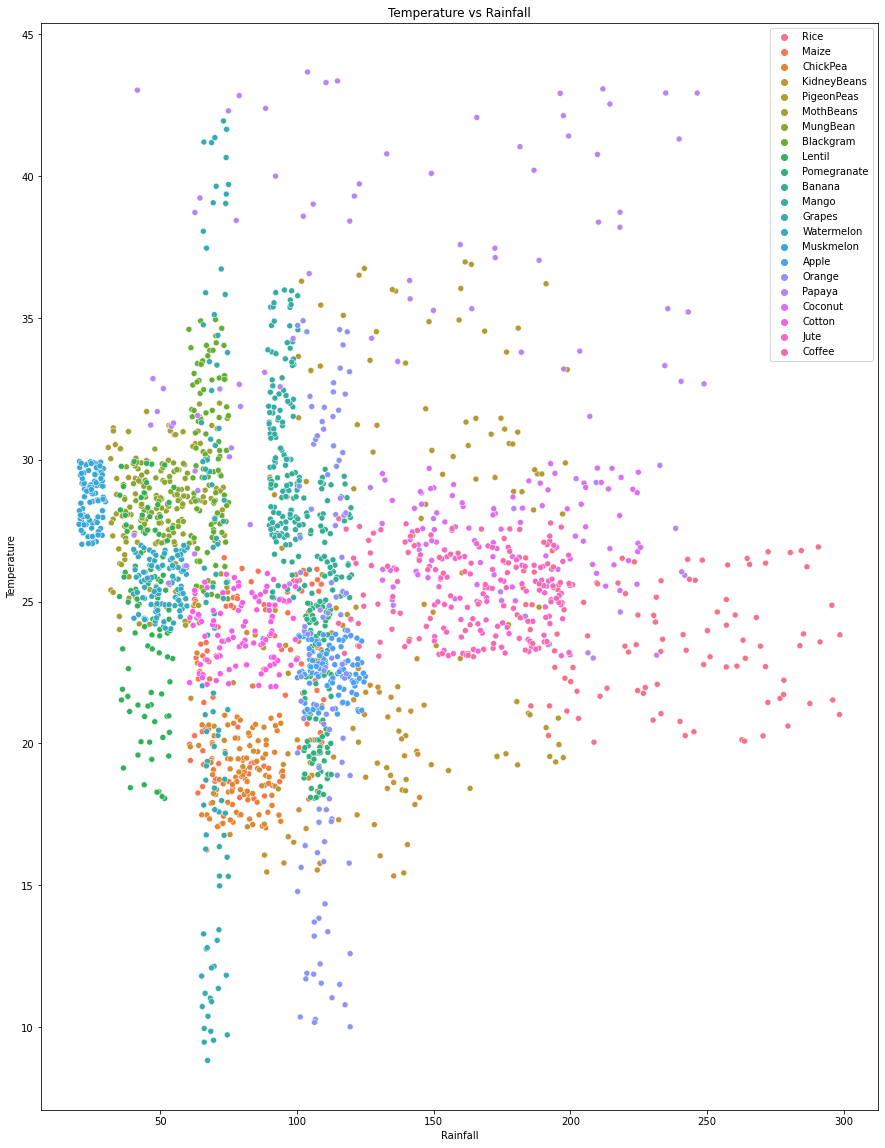

In [12]:
plt.figure(figsize = (15,20))
sns.scatterplot(data=df, x='Rainfall', y='Temperature', hue='Crop').set_title("Temperature vs Rainfall")
plt.legend(loc='best')

This scatterplot is showcasing the temperature vs rainfall for all the crops.

### Overall Research 

Three primary macronutrients essential to successful crop growth are *Nitrogen, Phosporus and Potassium*...


https://cropnuts.com/nitrogen-phosphorus-potassium-npk-fertilizers/

**Nitrogen** : important to crops because in most crops it can be the main nutrient to affect yield and plant health. It is also an essential component of the structure of amino acids, proteins, chlorophyll (and more) in crops. 

https://www.corteva.ca/en/resources/agronomy-hub/understanding-nitrogen0.html

**Phosphorus**: is a main ingredient in ATP and a central component of DNA & RNA (which are needed to build proteins). It is also required by the plant from the seedling stage through to maturity and has an impact on crop quality and yield. 

https://taurus.ag/importance-of-phosphorus-to-crops/#:~:text=Ten%20ways%20phosphorus%20aids%20in%20plant%20growth%20and,earlier%20maturity%208%20Increases%20disease%20resistance%20More%20items

https://www.dpi.nsw.gov.au/agriculture/soils/more-information/improvement/phosphorous#:~:text=Phosphorus%20is%20one%20of%20the,for%20seedlings%20and%20young%20plants.

**Potassium**: is involved with the enzyme activation within the plant, which also affects the ATP production. In crops it also plays a role in helping regulate the exchange of water vapor, oxygen and carbon dioxide (the opening and closing of the stomata). 

https://extension.umn.edu/phosphorus-and-potassium/potassium-crop-production

**Soil p_H**: is an important indivator for the suitability of a soil for plant growth. According to the USDA for most crops pH of 6 to 7.5 is optimal. If the pH levels are too high are low, it can lead to a deficiency of nutrients

https://www.nrcs.usda.gov/sites/default/files/2022-11/pH%20-%20Soil%20Health%20Guide_0.pdf

**Humidity**: proper humidity levels ensure optimal transpiration, which is essential for nutrient uptake and effective photosynthesis, ultimately impacting plant growth and crop yield.



https://www.pthorticulture.com/en-us/training-center/how-does-humidity-influence-crop-quality

**Rainfall**: it supplies the water necessary for plants to absorb and distribute nutrients, essential for their survival and growth. Additionally, it plays a role in reducing soil erosion and enhancing soil fertility.

https://www.nicheagriculture.com/how-rainfall-affects-crop-health/

# EDA - Clustering

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.style as style

%matplotlib inline


### Import and Transform Data

In [14]:
df = pd.read_csv("./Data/Crop_Recommendation.csv")
y = df['Crop']
X = df.drop(columns = ['Crop'], axis = 1)
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

### Confusion Matrix for Basic LogReg on Unclustered Data

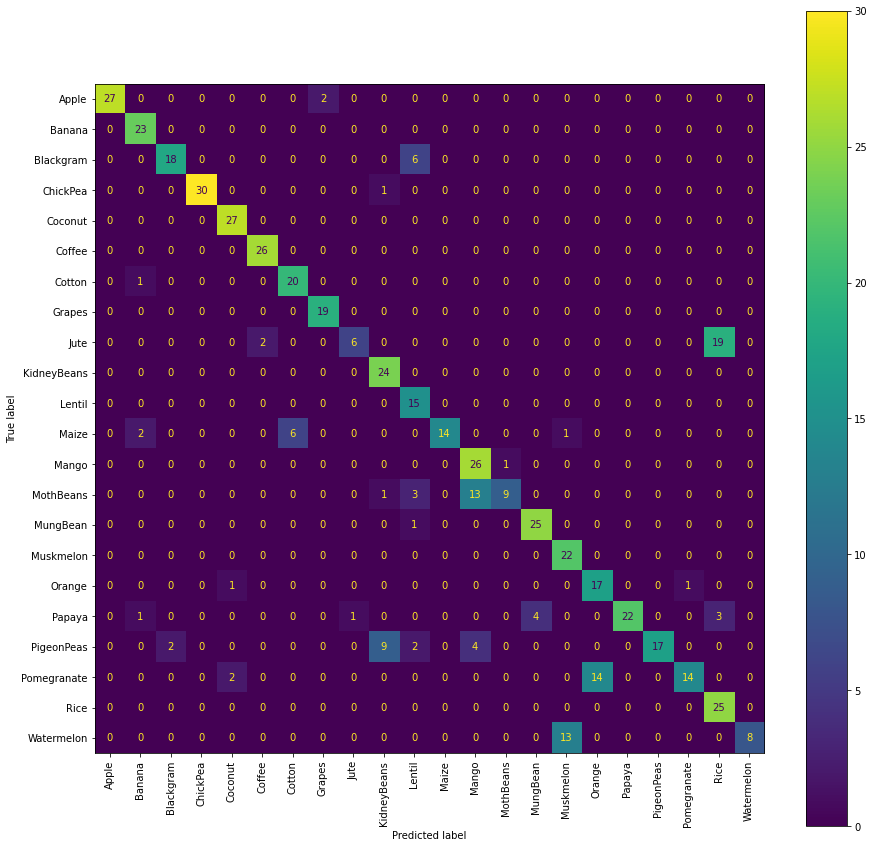

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
logreg_f = LogisticRegression(multi_class='multinomial', C=0.01, random_state=42)
logreg_f.fit(X_train_sc, y_train)

fig, ax = plt.subplots(figsize=(15,15))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=logreg_f,
                     X=X_test_sc,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical')

### Look at means of each column for each cluster to get an idea of what crops are similar

In [16]:
features = ['Nitrogen', 'Phosphorus','Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
columns = [(feature, 'mean') for feature in features]
means_df = df.groupby("Crop").describe()[columns]
means_df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
Banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
ChickPea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
Cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
Grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829


### Create elbow plot for various numbers of clusters

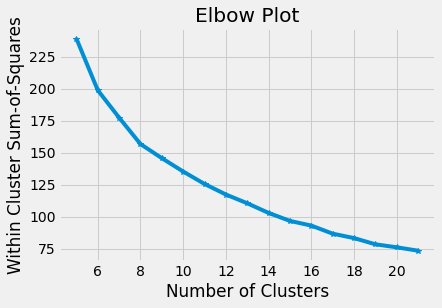

In [17]:
W = []
cluster_range = list(range(5,22))

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    W.append(kmeans.inertia_)
style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(cluster_range, W, '-*')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum-of-Squares')
ax.set_title('Elbow Plot')
ax.set_xticks(cluster_range[1::2])

### Create silhouette plots for various number of clusters

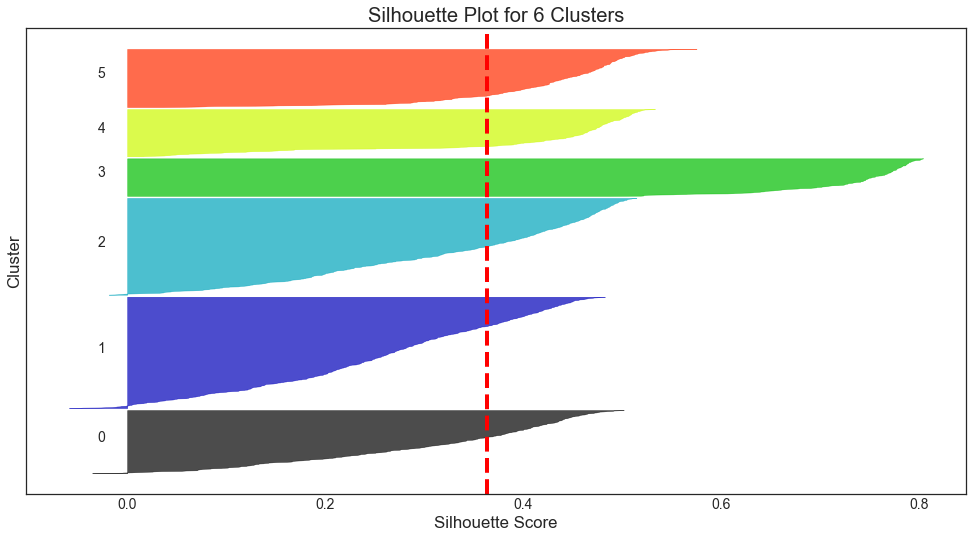

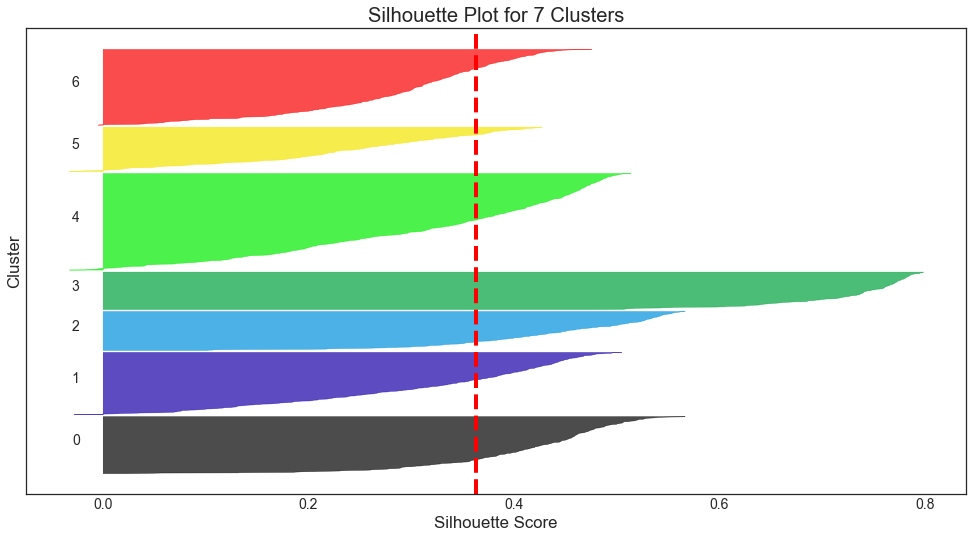

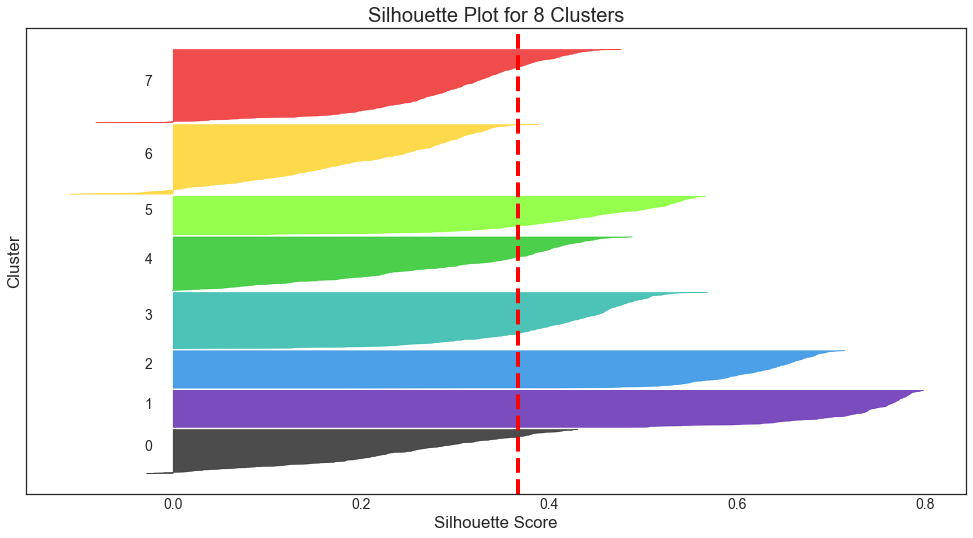

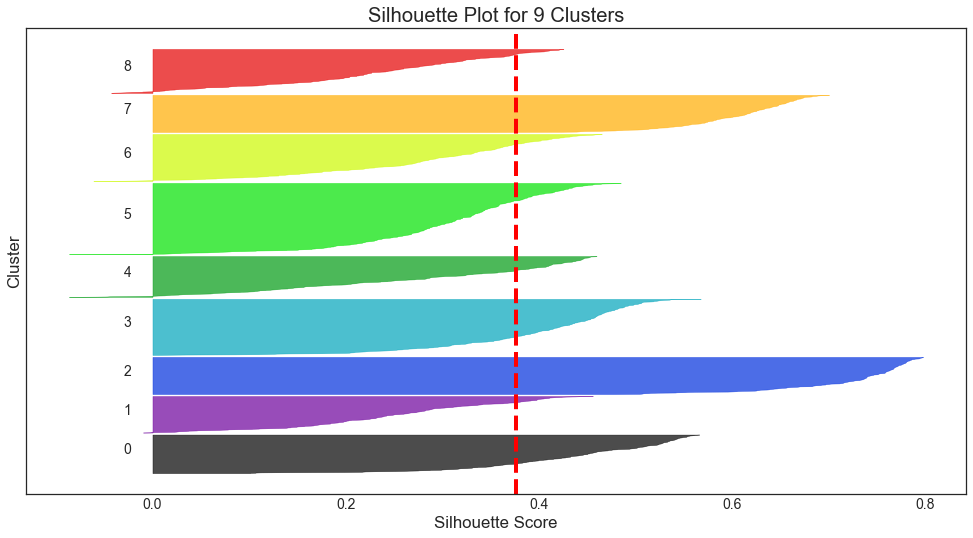

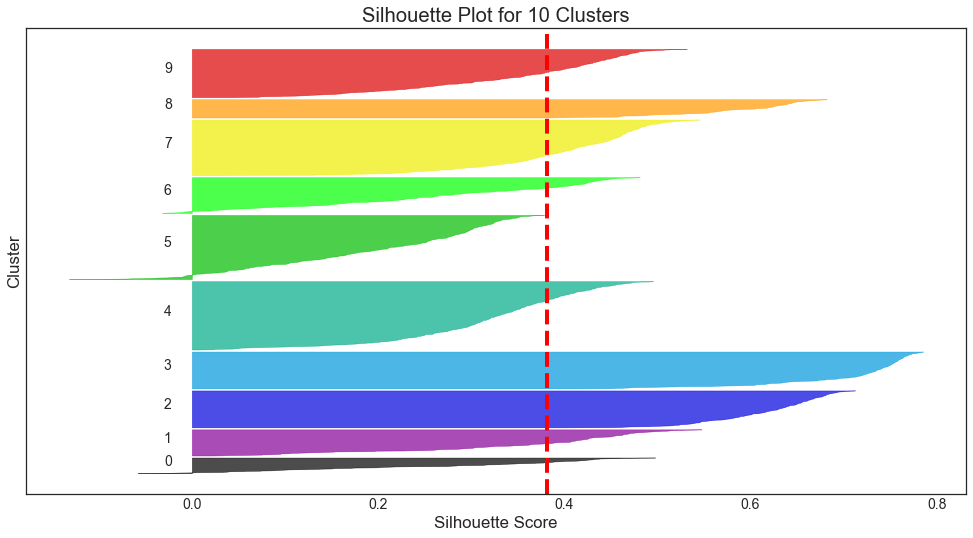

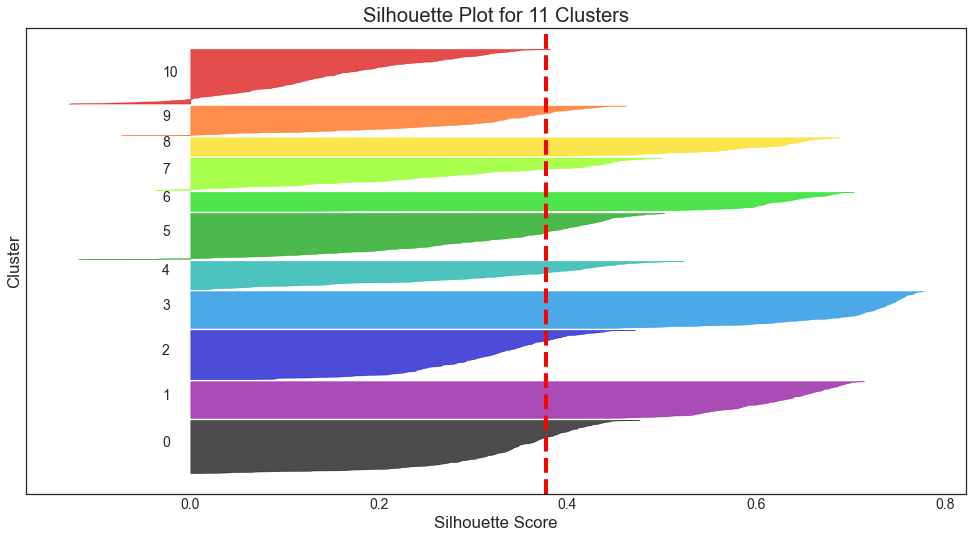

In [18]:
import numpy as np
count = 0
style.use('seaborn-white')
for k in np.arange(6,12):
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    c = KMeans(n_clusters=k, random_state=0).fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, c)
    sample_silhouette_values = silhouette_samples(X_transformed, c)
    
    y_lower=10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[c == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Cluster')
    ax.set_title('Silhouette Plot for ' + str(k) + ' Clusters')
    
    ax.set_yticks([])
    
    count += 1

### Cluster with 8 clusters on scaled X data and get count for observations of each crop in each cluster

In [19]:
kmeans = KMeans(n_clusters=8, random_state = 0).fit_predict(X_transformed)
df_kmeans = df.copy()
df_kmeans["Cluster"] = kmeans
clusters = {}
for index, row in df_kmeans.iterrows():

    if row.Cluster not in clusters:
        clusters[row.Cluster] = {row.Crop: 1}
    else:
        cluster = clusters[row.Cluster]
        if row.Crop in cluster:
            cluster[row.Crop] += 1
        else:
            cluster[row.Crop] = 1


### Create final clustering by adding crop to cluster if at least half of its observations are in that cluster

In [20]:
final_clusters = {}
for cluster in clusters:
    final_clusters[cluster] = []
    for crop in clusters[cluster]:
        if clusters[cluster][crop] > 50:
            final_clusters[cluster].append(crop)
print(final_clusters)
print(clusters)

{4: ['Rice', 'Papaya', 'Jute'], 6: ['Maize', 'Banana', 'Cotton', 'Coffee'], 7: ['MothBeans', 'MungBean', 'Blackgram', 'Lentil'], 5: ['ChickPea', 'KidneyBeans'], 0: ['PigeonPeas', 'Mango'], 3: ['Pomegranate', 'Orange', 'Coconut'], 1: ['Grapes', 'Apple'], 2: ['Watermelon', 'Muskmelon']}
{4: {'Rice': 100, 'PigeonPeas': 1, 'Papaya': 56, 'Jute': 96, 'Coffee': 34}, 6: {'Maize': 99, 'Banana': 100, 'Papaya': 4, 'Cotton': 100, 'Jute': 4, 'Coffee': 66}, 7: {'Maize': 1, 'PigeonPeas': 1, 'MothBeans': 53, 'MungBean': 100, 'Blackgram': 100, 'Lentil': 100, 'Papaya': 37}, 5: {'ChickPea': 100, 'KidneyBeans': 100, 'PigeonPeas': 8}, 0: {'PigeonPeas': 90, 'MothBeans': 47, 'Mango': 100}, 3: {'Pomegranate': 100, 'Orange': 100, 'Papaya': 2, 'Coconut': 100}, 1: {'Grapes': 100, 'Apple': 100}, 2: {'Watermelon': 100, 'Muskmelon': 100, 'Papaya': 1}}


### Change target to cluster and save to csv

In [21]:
print(final_clusters)
df_clusters = df.copy()
clusters = []
for idx, row in df_clusters.iterrows():
    for cluster in final_clusters.values():
        if row.Crop in cluster:
            cluster_name = ""
            for crop in cluster:
                cluster_name += crop + "_"
            clusters.append(cluster_name[:-1])
            continue
df_clusters = pd.concat([df_clusters, pd.DataFrame(clusters,columns=["Crop_Cluster"])], axis = 1)
df_clusters.drop("Crop", axis=1, inplace=True)
df_clusters.to_csv("./Data/Crop_Recommendation_with_clusters.csv")

{4: ['Rice', 'Papaya', 'Jute'], 6: ['Maize', 'Banana', 'Cotton', 'Coffee'], 7: ['MothBeans', 'MungBean', 'Blackgram', 'Lentil'], 5: ['ChickPea', 'KidneyBeans'], 0: ['PigeonPeas', 'Mango'], 3: ['Pomegranate', 'Orange', 'Coconut'], 1: ['Grapes', 'Apple'], 2: ['Watermelon', 'Muskmelon']}


### Confusion matrix and accuracy for basic logreg on clustered crops

0.9163636363636364

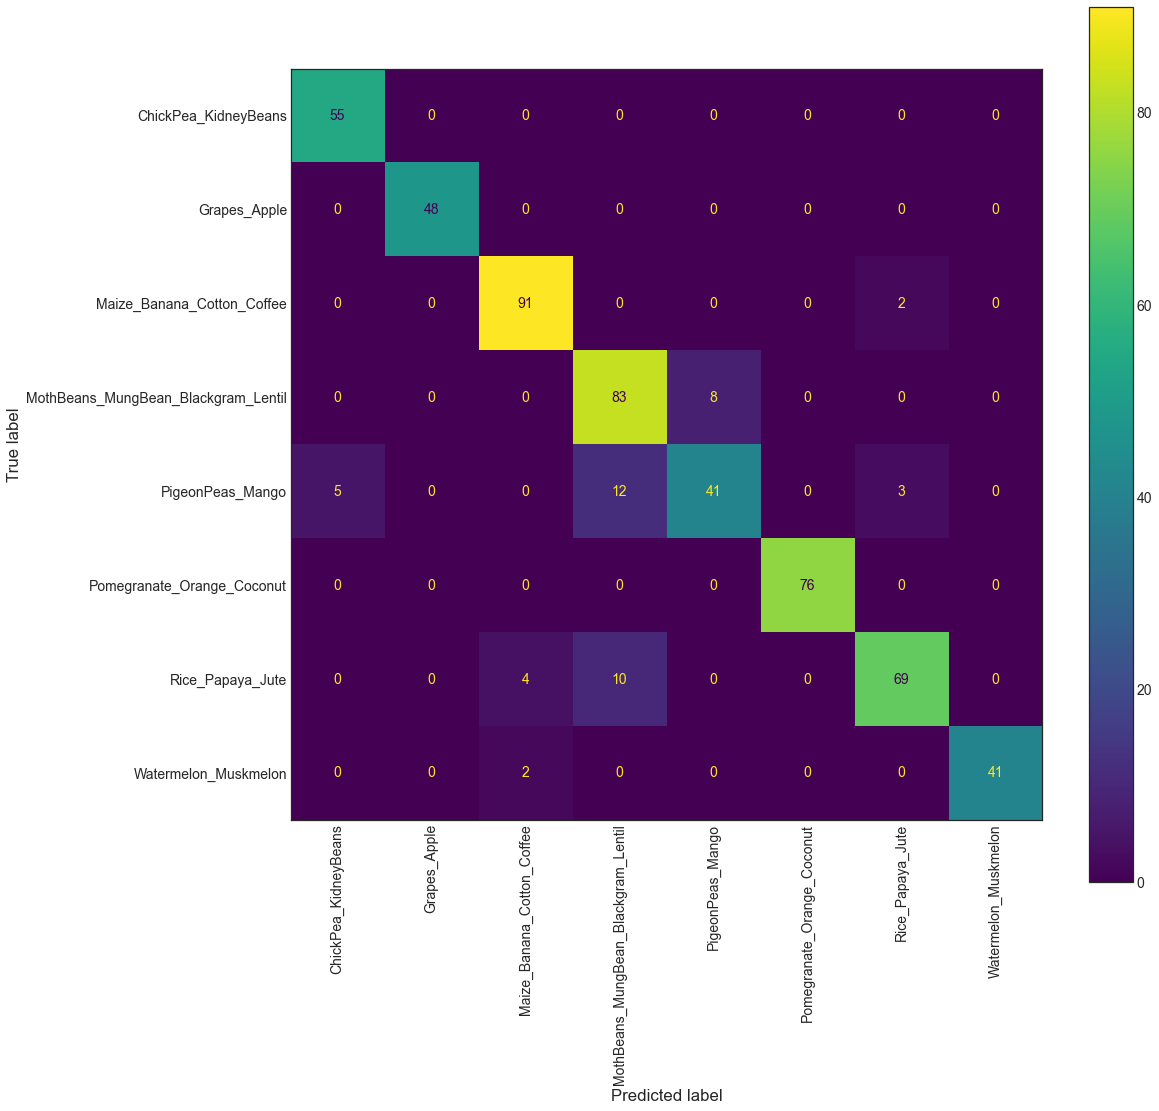

In [22]:
X = df_clusters.drop("Crop_Cluster", axis=1)
y = df_clusters["Crop_Cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
logreg_f = LogisticRegression(multi_class='multinomial', C=0.01, random_state=42)
logreg_f.fit(X_train_sc, y_train)
fig, ax = plt.subplots(figsize=(15,15))
ConfusionMatrixDisplay.from_estimator(estimator=logreg_f,
                     X=X_test_sc,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical')
logreg_f.score(X_test_sc, y_test)

# Model - Logistic Regression

### Import Data and Packages

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [56]:
df = pd.read_csv('Data/Crop_Recommendation_with_clusters.csv', index_col=0)

### Split into Train and Test Sets

In [57]:
X = df.drop('Crop_Cluster', axis=1)
y = df['Crop_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Normalize the Input Data

In [58]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)


### Perform Grid Search on Parameters C and fit_intercept

In [59]:
grid = [{'C': [1e1,1e2,1e3,1e4,1e5,1e6],
        'fit_intercept': [True, False]}]
gridsearch = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),
            param_grid=grid,
            scoring='accuracy',
            cv=4)
gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                1000000.0],
                          'fit_intercept': [True, False]}],
             scoring='accuracy')

In [60]:
gridsearch.cv_results_ #Preview Results

{'mean_fit_time': array([0.00498021, 0.00557601, 0.00393945, 0.00657612, 0.0084728 ,
        0.00702876, 0.00771827, 0.00546694, 0.00707829, 0.00850183,
        0.00751632, 0.00583607]),
 'std_fit_time': array([0.00337861, 0.00089478, 0.00682333, 0.00828176, 0.00710234,
        0.00067147, 0.00557782, 0.00202622, 0.00123908, 0.00854801,
        0.00066284, 0.00650811]),
 'mean_score_time': array([0.00433254, 0.00051743, 0.00390404, 0.00050199, 0.00049996,
        0.00128931, 0.00065029, 0.00281835, 0.00073016, 0.00049698,
        0.00024641, 0.00343424]),
 'std_score_time': array([0.00660206, 0.00051799, 0.006762  , 0.00050199, 0.00086596,
        0.00042454, 0.00043534, 0.00244858, 0.00042203, 0.0008608 ,
        0.00042679, 0.00499839]),
 'param_C': masked_array(data=[10.0, 10.0, 100.0, 100.0, 1000.0, 1000.0, 10000.0,
                    10000.0, 100000.0, 100000.0, 1000000.0, 1000000.0],
              mask=[False, False, False, False, False, False, False, False,
                    

In [61]:
gridsearch.best_estimator_ # See the best estimator

LogisticRegression(C=10000.0, solver='liblinear')

In [62]:
gridsearch.best_score_ # get the score for the best estimator

0.9880681818181819

In [63]:
gridsearch.best_params_ # Get the best params

{'C': 10000.0, 'fit_intercept': True}

### Visualize Grid Search

In [64]:
mean_test_scores = gridsearch.cv_results_['mean_test_score']
params = gridsearch.cv_results_['params']
mean_scores_fit = []
mean_scores_nofit = []
Cs_fit = []
Cs_nofit = []
# Create Arrays for mean_test_scores and C-value
for i in range(len(mean_test_scores)):
    if params[i]['fit_intercept'] == False:
        mean_scores_nofit.append(mean_test_scores[i])
        Cs_nofit.append(params[i]['C'])
    else:
        mean_scores_fit.append(mean_test_scores[i])
        Cs_fit.append(params[i]['C'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


(0.946, 0.963)

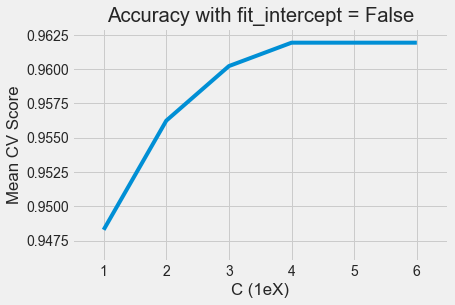

In [65]:
style.use('fivethirtyeight')
print(style.available)
plt.plot([1,2,3,4,5,6], mean_scores_nofit) # plot mean scores with fit_intercept=False (X values are log(C))
plt.xlabel("C (1eX)")
plt.ylabel("Mean CV Score")
plt.title("Accuracy with fit_intercept = False")
plt.xlim(.5,6.5)
plt.ylim(.946,.963)

(0.5, 6.5)

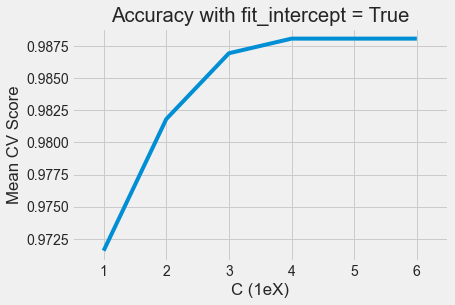

In [66]:
plt.plot([1,2,3,4,5,6], mean_scores_fit) # plot mean scores with fit_intercept=True
style.use('fivethirtyeight')
plt.xlabel("C (1eX)")
plt.ylabel("Mean CV Score")
plt.title("Accuracy with fit_intercept = True")
plt.xlim(.5,6.5)

### Combine GridSearch Results

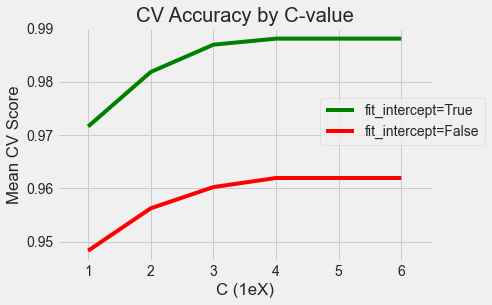

In [67]:
style.use('fivethirtyeight')

plt.plot([1,2,3,4,5,6], mean_scores_fit, label='fit_intercept=True', c='g') # plot mean scores with fit_intercept=True
plt.xlabel("C (1eX)")
plt.ylabel("Mean CV Score")
plt.title("CV Accuracy by C-value")
plt.xlim(.5,6.5)

plt.plot([1,2,3,4,5,6], mean_scores_nofit, label='fit_intercept=False', c='r') # plot mean scores with fit_intercept=False (X values are log(C))
plt.xlabel("C (1eX)")
plt.ylabel("Mean CV Score")
plt.xlim(.5,6.5)
plt.legend(loc=(.7,.5), frameon=True)

### Train the Best Model

In [68]:
final_logReg = LogisticRegression(solver = 'liblinear', C=1e4, fit_intercept=True)
final_logReg.fit(X_train_scaled, y_train)

LogisticRegression(C=10000.0, solver='liblinear')

### Evaluate on Train and Test Data

In [69]:
final_logReg.score(X_train_scaled, y_train)

0.990909090909091

In [70]:
final_logReg.score(X_test_scaled, y_test)

0.9795454545454545

### Plot Confusion Matrices for Train and Test Data

Text(0.5, 1.0, 'Logistic Regression Train Confusion Matrix')

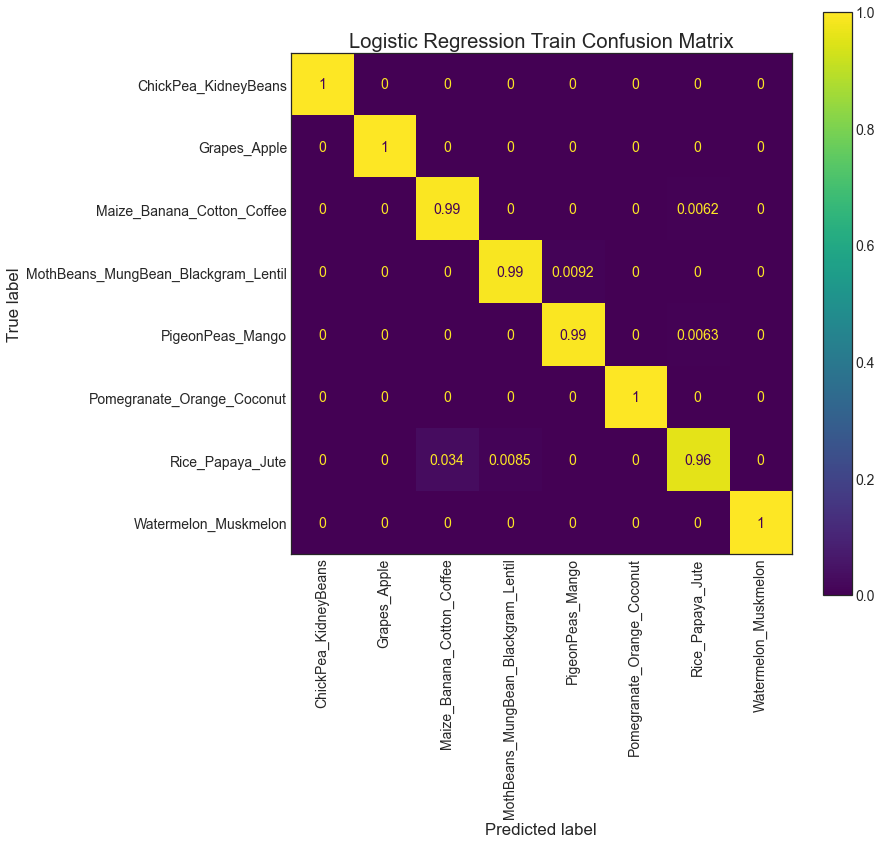

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=final_logReg,
                     X=X_train_scaled,
                     y=y_train,
                     ax = ax,
                     xticks_rotation='vertical',
                     normalize='true')
plt.title("Logistic Regression Train Confusion Matrix")

Text(0.5, 1.0, 'Logistic Regression Train Confusion Matrix')

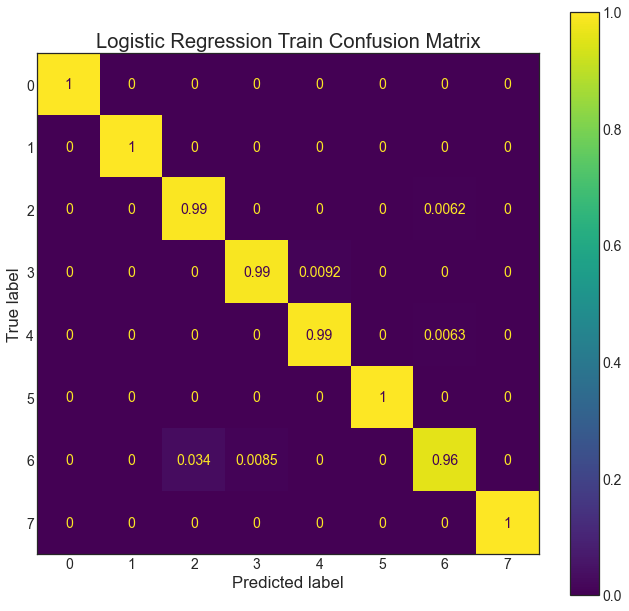

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=final_logReg,
                     X=X_train_scaled,
                     y=y_train,
                     ax = ax,
                     normalize='true',
                     display_labels=['0','1','2','3','4','5','6','7'])
plt.title("Logistic Regression Train Confusion Matrix")

Text(0.5, 1.0, 'Logistic Regression Test Confusion Matrix')

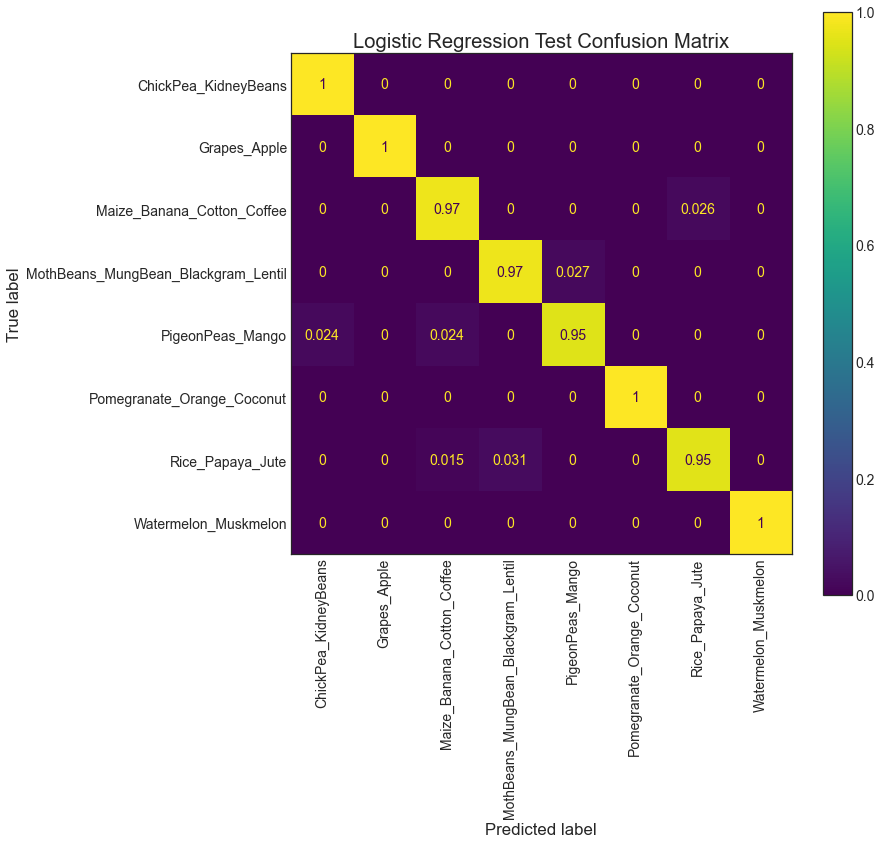

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=final_logReg,
                     X=X_test_scaled,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical',
                     normalize='true')
plt.title("Logistic Regression Test Confusion Matrix")

Text(0.5, 1.0, 'Logistic Regression Test Confusion Matrix')

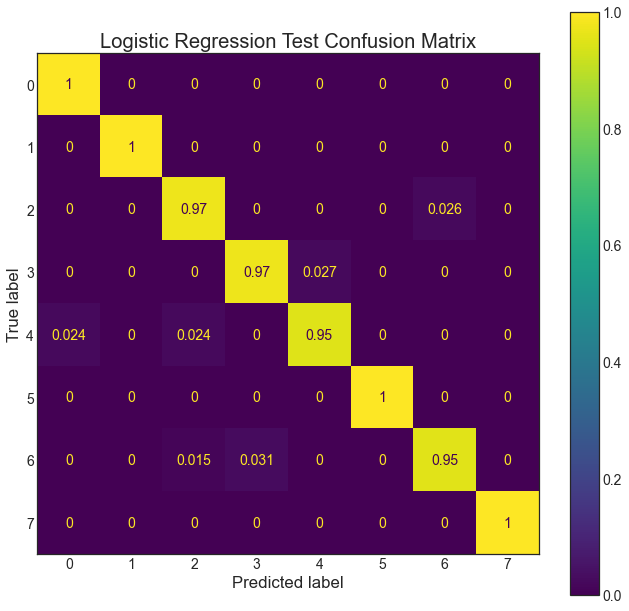

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=final_logReg,
                     X=X_test_scaled,
                     y=y_test,
                     ax = ax,
                     normalize='true',
                     display_labels=['0','1','2','3','4','5','6','7'])
plt.title("Logistic Regression Test Confusion Matrix")

# Model - Random Forest

In [76]:
import pandas as pd
import numpy as np 
np.random.seed(0)
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### Load the Dataset & Prepare the Data

In [77]:
df = pd.read_csv("Data/Crop_Recommendation_with_clusters.csv", index_col=0)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop_Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice_Papaya_Jute
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice_Papaya_Jute
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice_Papaya_Jute
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice_Papaya_Jute
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice_Papaya_Jute


In [78]:
target = df.Crop_Cluster
df = df.drop("Crop_Cluster", axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=43, stratify=target)

### Define the Random Forest Classifier and Fit to the Training Data
##### Random Forest Classifier: Max Depth of 3 and 30 Estimators

In [80]:
forest = RandomForestClassifier(max_depth = 3, n_estimators=30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

### Score the Random Forest Classifier on the Training & Testing Data

In [81]:
forest.score(X_train, y_train)

0.963030303030303

In [82]:
forest.score(X_test, y_test)

0.9581818181818181

### View the Features Importance from Most to Least Important

In [83]:
style.use('fivethirtyeight')
def get_feature_importance_dict(model):
    featureImpList= []
    for feat, importance in zip(X_train.columns, model.feature_importances_):  
        temp = [feat, importance]
        featureImpList.append(temp)

    fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
    return (fT_df.sort_values('Importance', ascending = True))

def plotImportanceOrdered(model):
    feature_dict = get_feature_importance_dict(model)
    features = list(feature_dict["Feature"])
    importances = list(feature_dict["Importance"])
    plt.figure(figsize=(8,8))
    plt.barh(range(len(feature_dict)), importances, tick_label=features)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    return

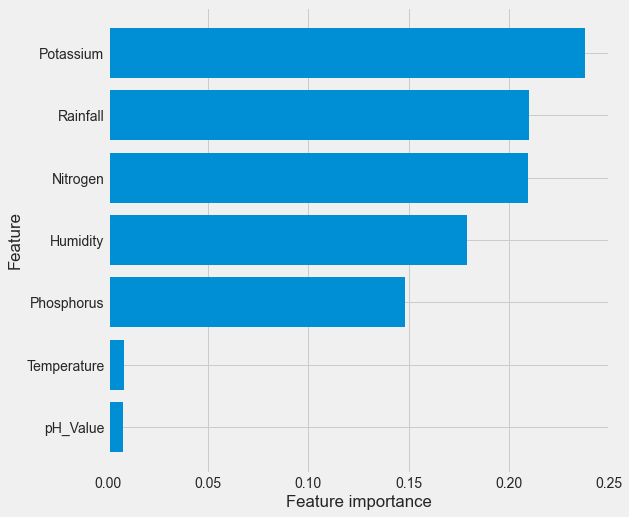

In [84]:
plotImportanceOrdered(forest)

### Gather Additional Performance Statistics on the Model from Testing Data

In [85]:
pred3 = forest.predict(X_test)
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

[[ 50   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0]
 [  0   0   1  98   1   0   0   0]
 [  0   0   0   0  40  10   0   0]
 [  0   0   0   0   0  75   0   0]
 [  0   0   1   3   0   5  64   2]
 [  0   0   0   0   0   0   0  50]]
                                     precision    recall  f1-score   support

               ChickPea_KidneyBeans       1.00      1.00      1.00        50
                       Grapes_Apple       1.00      1.00      1.00        50
         Maize_Banana_Cotton_Coffee       0.98      1.00      0.99       100
MothBeans_MungBean_Blackgram_Lentil       0.97      0.98      0.98       100
                   PigeonPeas_Mango       0.98      0.80      0.88        50
         Pomegranate_Orange_Coconut       0.83      1.00      0.91        75
                   Rice_Papaya_Jute       1.00      0.85      0.92        75
               Watermelon_Muskmelon       0.96      1.00      0.98        50

                        

Text(0.5, 1.0, 'Random Forest Test Confusion Matrix')

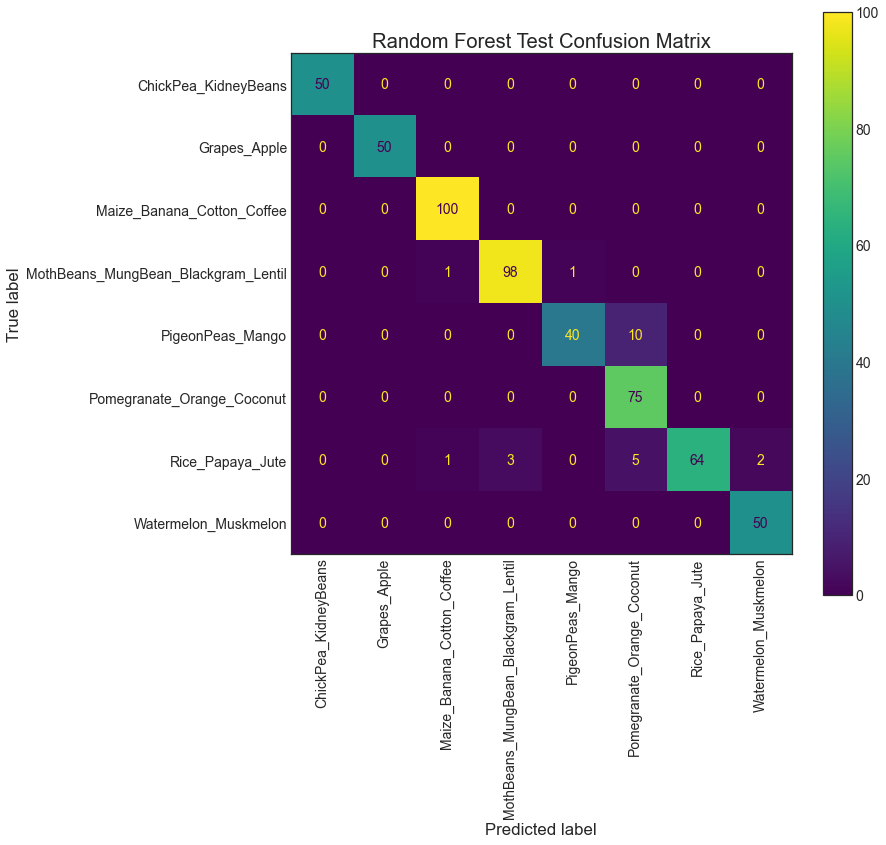

In [86]:
style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=forest,
                     X=X_test,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical')
ax.set_title("Random Forest Test Confusion Matrix")

Text(0.5, 1.0, 'Random Forest Test Confusion Matrix')

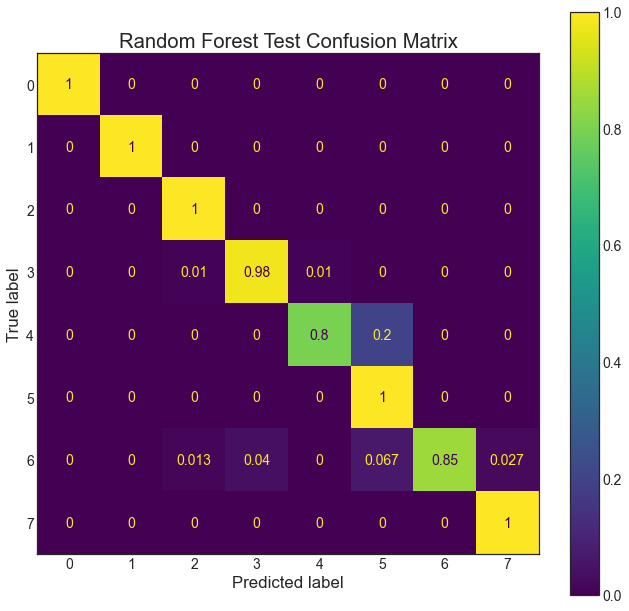

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=forest,
                     X=X_test,
                     y=y_test,
                     ax = ax,
                     normalize='true',
                     display_labels=['0','1','2','3','4','5','6','7']
                                     )
ax.set_title("Random Forest Test Confusion Matrix")